<a href="https://colab.research.google.com/github/iqranaz240/8-Ball-Magic-Flutter-App/blob/master/QKD_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
from math import e
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

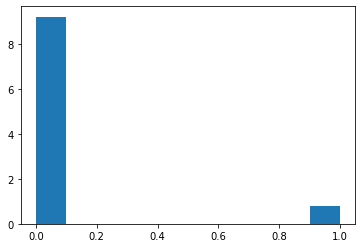

In [2]:
s = np.random.poisson(0.1, 100)
count, bins, ignored = plt.hist(s, 10, density=True)
plt.show()

In [3]:
print(s)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [4]:
class Photon:

  def __init__(self, polarization, intensity, energy, frequency):
    self.intensity = intensity
    self.energy = energy
    self.frequency = frequency
        
  def polarization(self, theta, phi):
    self.theta = theta
    self.phi = phi
    polarize_photon = np.array([math.cos(theta/2), (e**((0+1j)*phi))*math.sin(theta/2)])
    return polarize_photon

  def generate_photon(self, iterations):
    for iteration in range(iterations):
      if (s[iteration] == 2):
        return self.polarization(0,0)  #call photon constructor twice
        iteration+=1
      elif (s[iteration] == 1):
        return self.polarization(0,0)  #call photon construstor
        iteration+=1
    else:
        iteration+=1

In [5]:
p = Photon(1,2,3,4)
p.generate_photon(100)


array([1.+0.j, 0.+0.j])

In [6]:
class Optical_Fibre:
  def __init__(self, attenuation_costant, length_of_fiber, Photon ):
    self.length_of_fiber = length_of_fiber
    self.attenuation_costant = attenuation_costant
    self.dispersion_coefficient = dispersion_coefficient
    self.spectral_width = spectral_width

    def attenuation(self):
        attenuation_of_fiber = attenuation_costant*length_of_fiber
        return attenuation_of_fiber

    def transfer_efficiency(self):
        x = (attenuation_costant*length_of_fiber)/10
        exponent = -(x)
        efficiency = np.power(10, exponent)
        return efficiency

    def intramodal_dispersion(self):
         chromatic_dispersion = dispersion_coefficient*length_of_fiber*spectral_width
         return chromatic_dispersion


In [7]:
class Alice_Encoding(Photon):
  def __init__(self, bits):
    self.bits = bits
    self.a_bits = None
    self.a_basis = None
    self.a_encoded_photons = None
    self.a_encoded_polarized_photons = None

  def alice_bits_basis_generation(self):
    x = random.choice([0, 1], size=(1, self.bits))
    self.a_bits = x[0]
    y = random.choice(['e', 'f'], size=(1, self.bits))
    self.a_basis = y[0]
    return self.a_bits, self.a_basis

  def alice_prepare_photons(self):
    self.a_encoded_photons = []
    self.alice_bits_basis_generation()
    for bit in range(len(self.a_bits)):
      if self.a_bits[bit] == 0:
       if self.a_basis[bit] == 'e':
        self.a_encoded_photons.append('e1')
        #print('e1')
        bit+=1
       else:
         self.a_encoded_photons.append('f1')
        #print('f1')
         bit+=1

      elif self.a_bits[bit] == 1:
        if self.a_basis[bit] == 'e':
         self.a_encoded_photons.append('e2')
         #print('e2')
         bit+=1
        else:
          self.a_encoded_photons.append('f2')
          #print('f2')
          bit+=1
    return self.a_encoded_photons

  def alice_polarize_photons(self):
    self.a_encoded_polarized_photons = []
    for bit in range(len(self.a_bits)):
      if self.a_encoded_photons[bit] == 'e1':
        pol = self.polarization(0,0)
        self.a_encoded_polarized_photons.append(pol)
        bit+=1

      elif self.a_encoded_photons[bit] == 'e2':
        pol = self.polarization(180,0)
        self.a_encoded_polarized_photons.append(pol)
        bit+=1

      elif self.a_encoded_photons[bit] == 'f1':
        pol = self.polarization(90,0)
        self.a_encoded_polarized_photons.append(pol)
        bit+=1    

      elif self.a_encoded_photons[bit] == 'f2':
        pol = self.polarization(90,180)
        self.a_encoded_polarized_photons.append(pol)
        bit+=1
    
    return self.a_encoded_polarized_photons


In [8]:
a = Alice_Encoding(16)
a.alice_bits_basis_generation()
print(a.a_basis)

['f' 'e' 'e' 'f' 'f' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'f' 'e' 'e']


In [9]:
class Bob_Encoding(Alice_Encoding):
  def __init__(self, bits):
    self.bits = bits
    self.received_photons = None
    self.bob_measured_photons = None
    self.b_decoded_photons = None
    #self.a_bits = None
    self.b_basis = None
    self.a_matched_photons = None
    #self.a_encoded_polarized_photons = None

  def bob_basis_generation(self):
    #y = random.choice(['e', 'f'], size=(1, self.bits))
    #self.b_basis = y[0]
    self.b_basis = a.a_basis
    return self.b_basis

  """
  def get_photons(self):
    self.received_photons = []
    for bit in range(len(self.b_basis)):
      if a.a_encoded_polarized_photons[bit] == [1.+0.j, 0.+0.j]:
        self.received_photons.append('e1')
        bit+=1

      elif a.a_encoded_polarized_photons[bit] == [-0.44807362+0.j,  0.89399666+0.j]:
        self.received_photons.append('e2')
        bit+=1

      elif a.a_encoded_polarized_photons[bit] == [0.52532199+0.j, 0.85090352+0.j]:
        self.received_photons.append('f1')
        bit+=1
      
      elif a.a_encoded_polarized_photons[bit] == [ 0.52532199+0.j, -0.50923178-0.6817036j]:
        self.received_photons.append('f2')
        bit+=1

    return self.received_photons
    """

  def bob_measure_photons(self):
    a.alice_prepare_photons()
    self.bob_measured_photons = []
    for bit in range(len(self.b_basis)):
      if a.a_encoded_photons[bit] == 'e1':
        self.bob_measured_photons.append(0)
        bit+=1
      elif a.a_encoded_photons[bit] == 'e2':
        self.bob_measured_photons.append(1)
        bit+=1
      elif a.a_encoded_photons[bit] == 'f1':
        self.bob_measured_photons.append(0)
        bit+=1
      elif a.a_encoded_photons[bit] == 'f2':
        self.bob_measured_photons.append(1)
        bit+=1
    return self.bob_measured_photons

  def bob_prepare_photons(self):
    self.b_decoded_photons = []
    self.bob_basis_generation()
    for bit in range(len(self.b_basis)):
      if self.bob_measured_photons[bit] == 0:
       if self.b_basis[bit] == 'e':
        self.b_decoded_photons.append('e1')
        bit+=1
       else:
         self.b_decoded_photons.append('f1')
         bit+=1

      elif self.bob_measured_photons[bit] == 1:
        if self.b_basis[bit] == 'e':
         self.b_decoded_photons.append('e2')
         bit+=1
        else:
          self.b_decoded_photons.append('f2')
          bit+=1
    return self.b_decoded_photons


In [10]:
b = Bob_Encoding(16)
b.bob_basis_generation()

array(['f', 'e', 'e', 'f', 'f', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e',
       'f', 'e', 'e'], dtype='<U1')

In [11]:
b.bob_measure_photons()
print(a.a_encoded_photons)


['f2', 'e2', 'f2', 'f2', 'e1', 'f2', 'e2', 'f1', 'f2', 'f1', 'f1', 'f1', 'f1', 'f2', 'f1', 'e1']


In [12]:
print(b.bob_measured_photons)

[1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]


In [13]:
b.bob_prepare_photons()
print(b.b_decoded_photons)

['f2', 'e2', 'f2', 'f2', 'e1', 'f2', 'e2', 'f1', 'f2', 'f1', 'f1', 'f1', 'f1', 'f2', 'f1', 'e1']


In [14]:
class Key_Generation:
  def __init__(self):
    self.bits = a.a_bits
    self.matched_position = None
    self.key = None

  def position_comparing(self):
    self.matched_position = []
    for bit in range(len(self.bits)):
      if a.a_encoded_photons[bit] == b.b_decoded_photons[bit]:
        self.matched_position.append(bit)
        bit+=1
      else:
        bit+=1
    return self.matched_position

  def key_founded(self):
    self.key = []
    for position in range(len(self.matched_position)):
      self.key.append(a.a_encoded_photons[self.matched_position[position]])
    return self.key


In [15]:
k = Key_Generation()
k.position_comparing()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [16]:
k.key_founded()

['f2',
 'e2',
 'f2',
 'f2',
 'e1',
 'f2',
 'e2',
 'f1',
 'f2',
 'f1',
 'f1',
 'f1',
 'f1',
 'f2',
 'f1',
 'e1']